This notebook is for testing the validity of warmup function.

In [2]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report

from spnc import spnc_anisotropy
import spnc_ml as ml

In [3]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

baseline = 0.5825, no warmup

seed warmup: 1234
length warmup: 0
Warmup data: 0


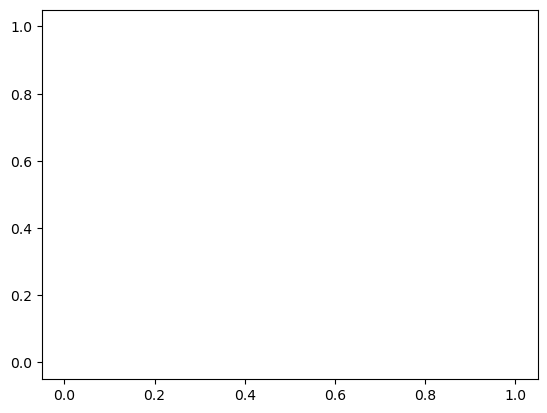

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: 0.4999998889492148
noise-free testing output
restarted
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


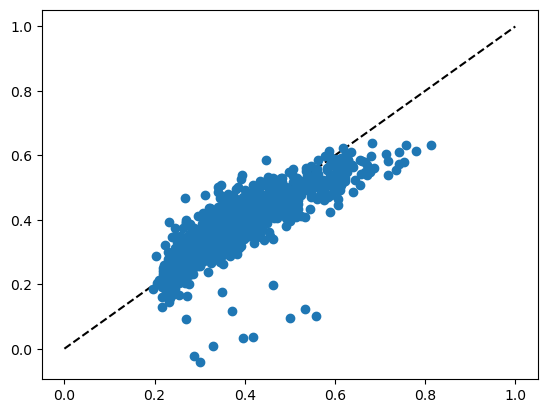

In [3]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 0

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add warmup, length = 50, nrmse = 0.62049

seed warmup: 1234
length warmup: 50
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49541871]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49541871]
noise-free testing output
restarted
Spacer NRMSE:0
0.004715300744673825 0.6204912389186418


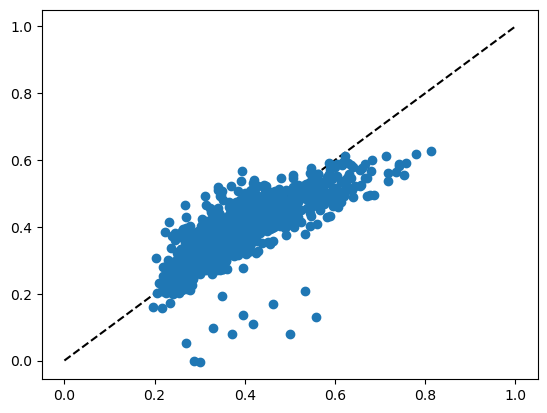

In [10]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 50

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

have a look at unrestart model with warm up, nrmse = 0.6238

seed warmup: 1234
length warmup: 20
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49634106]
noise-free training output
skip restarting..
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: test
p1 in test & fast: [0.49599308]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004767246812220442 0.6238996953542324


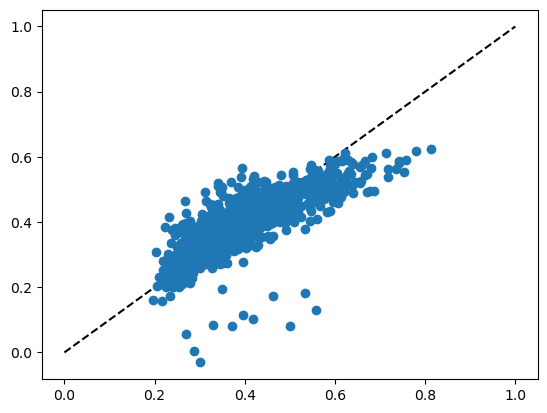

In [4]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 20

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Looks like warmup does work, but it is a negative influence. Let's do a loop to see more.

warmup loop:   0%|          | 0/11 [00:00<?, ?it/s]

seed warmup: 1234
length warmup: 0
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: 0.4999998889492148
noise-free testing output
restarted
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


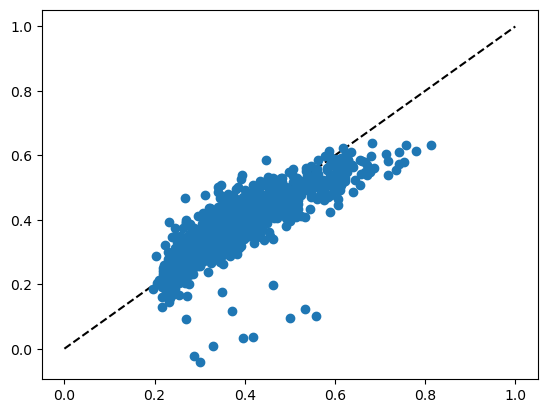

warmup loop:   9%|▉         | 1/11 [00:16<02:48, 16.86s/it]

seed warmup: 1234
length warmup: 100
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49443089]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49443089]
noise-free testing output
restarted
Spacer NRMSE:0
0.0046296117461314045 0.6148274381294413


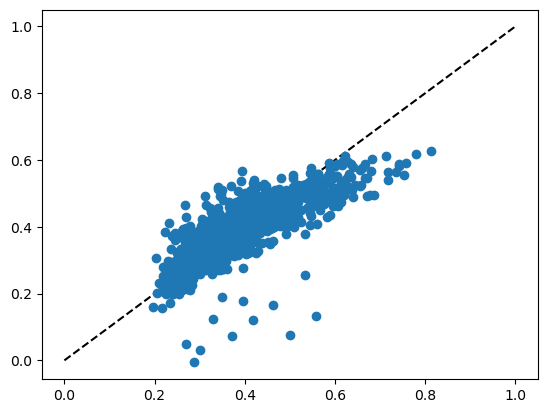

warmup loop:  18%|█▊        | 2/11 [00:35<02:39, 17.71s/it]

seed warmup: 1234
length warmup: 200
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49630978]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49630978]
noise-free testing output
restarted
Spacer NRMSE:0
0.004802865915109285 0.6262261316216731


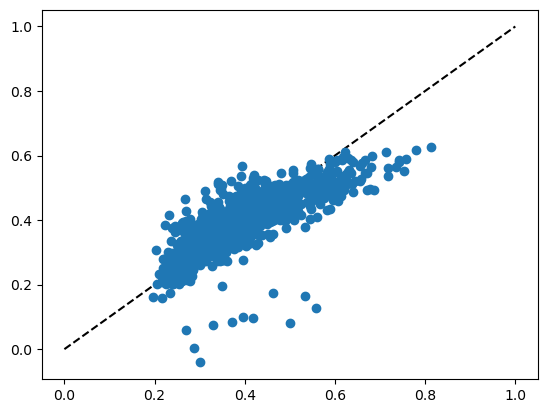

warmup loop:  27%|██▋       | 3/11 [00:53<02:25, 18.13s/it]

seed warmup: 1234
length warmup: 300
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49709613]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49709613]
noise-free testing output
restarted
Spacer NRMSE:0
0.004886326782285785 0.6316437583806406


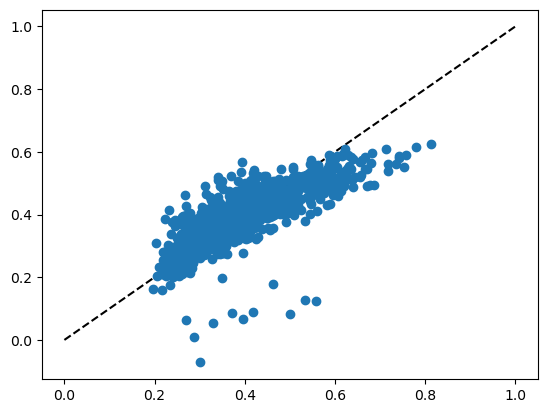

warmup loop:  36%|███▋      | 4/11 [01:14<02:14, 19.17s/it]

seed warmup: 1234
length warmup: 400
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49697714]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49697714]
noise-free testing output
restarted
Spacer NRMSE:0
0.004873424456577312 0.6308092807888904


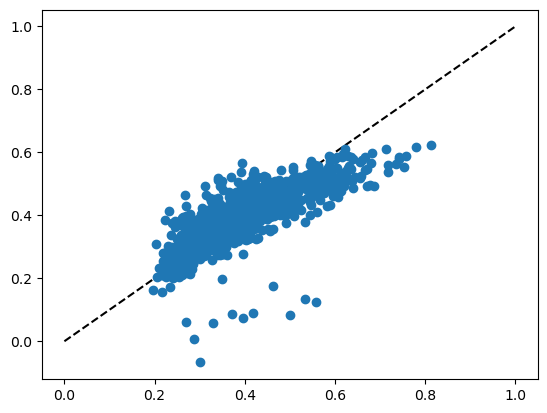

warmup loop:  45%|████▌     | 5/11 [01:36<02:01, 20.30s/it]

seed warmup: 1234
length warmup: 500
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49679711]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49679711]
noise-free testing output
restarted
Spacer NRMSE:0
0.004854064186219046 0.6295550506752843


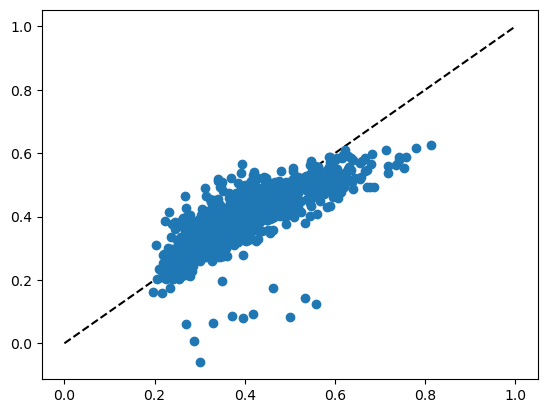

warmup loop:  55%|█████▍    | 6/11 [02:00<01:46, 21.34s/it]

seed warmup: 1234
length warmup: 600
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49589084]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49589084]
noise-free testing output
restarted
Spacer NRMSE:0
0.004760603713205129 0.6234648455872984


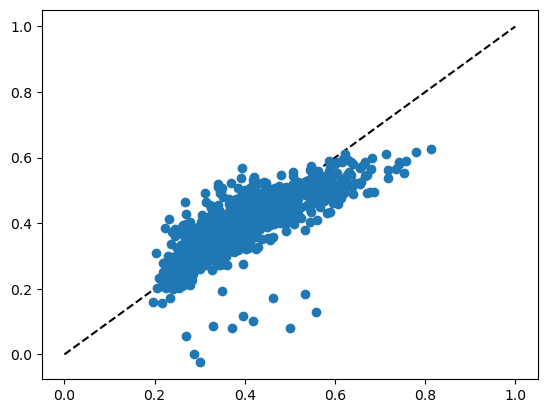

warmup loop:  64%|██████▎   | 7/11 [02:22<01:27, 21.79s/it]

seed warmup: 1234
length warmup: 700
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49664909]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49664909]
noise-free testing output
restarted
Spacer NRMSE:0
0.004838311981137835 0.6285327177982264


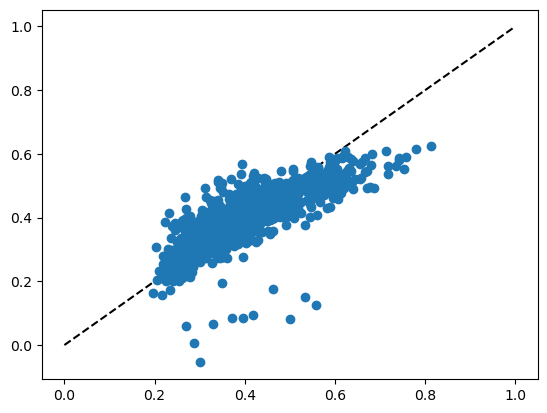

warmup loop:  73%|███████▎  | 8/11 [02:44<01:05, 21.81s/it]

seed warmup: 1234
length warmup: 800
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49510171]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49510171]
noise-free testing output
restarted
Spacer NRMSE:0
0.0046864096572810186 0.6185874143675631


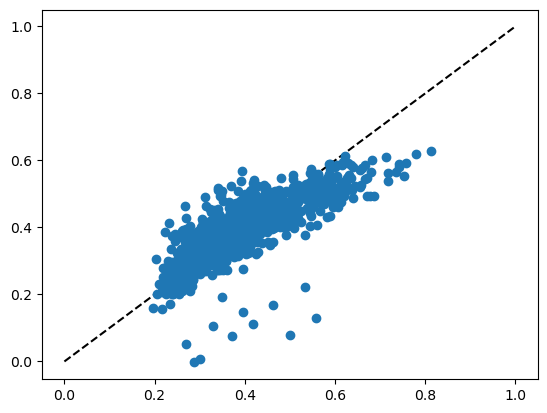

warmup loop:  82%|████████▏ | 9/11 [03:08<00:44, 22.48s/it]

seed warmup: 1234
length warmup: 900
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49582297]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49582297]
noise-free testing output
restarted
Spacer NRMSE:0
0.004753932733972534 0.6230278653909107


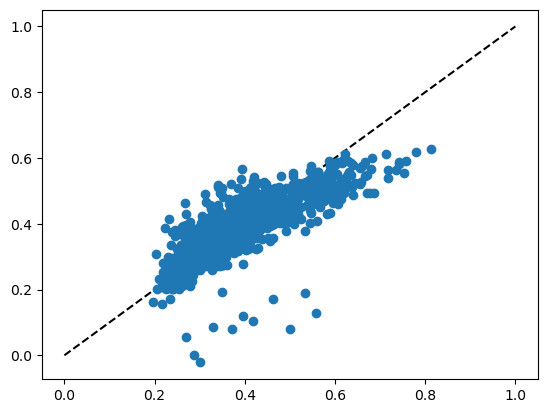

warmup loop:  91%|█████████ | 10/11 [03:33<00:23, 23.18s/it]

seed warmup: 1234
length warmup: 1000
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49581731]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: warmup
p1 in warmup & fast: [0.49581731]
Spacer NRMSE:0
0.0047533790003893095 0.6229915794863436


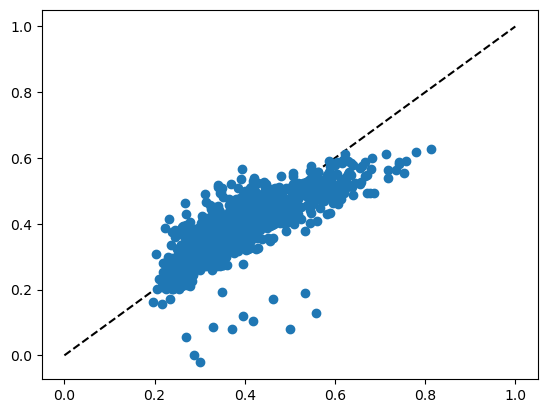

warmup loop: 100%|██████████| 11/11 [03:58<00:00, 21.66s/it]


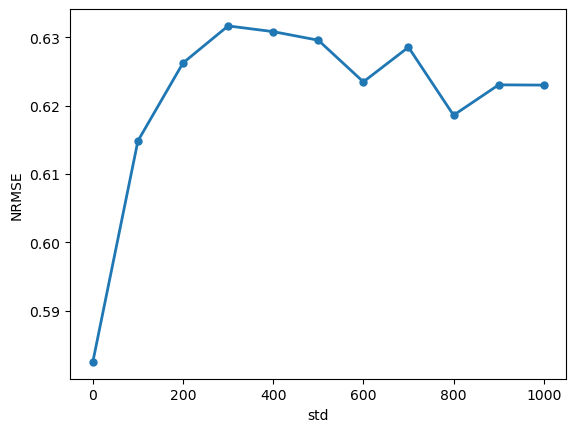

In [9]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 3

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# std loop
warmup_list = np.arange(0,1001,100)

nrmse_list = []

for i in tqdm(warmup_list,desc='warmup loop'):
    Nwarmup = i
    params['length_warmup'] = Nwarmup
    params['warmup_sample'] = Nwarmup*Nvirt
    nrmse = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    nrmse_list.append(nrmse)

# plot
plt.plot(warmup_list,nrmse_list, 'o-', markersize=5, linewidth=2)    
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()

the benefit of direct using warmup is not good (exact negative). let's use p1+warmup, nrmse = 0.6204(0.501)

seed warmup: 12
length warmup: 5
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.1
current phase: train
p1 in train & fast: [0.49727443]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.1
current phase: test
p1 in test & fast: [0.49727443]
noise-free testing output
restarted
Spacer NRMSE:0
0.004905791510493052 0.6329005873718117


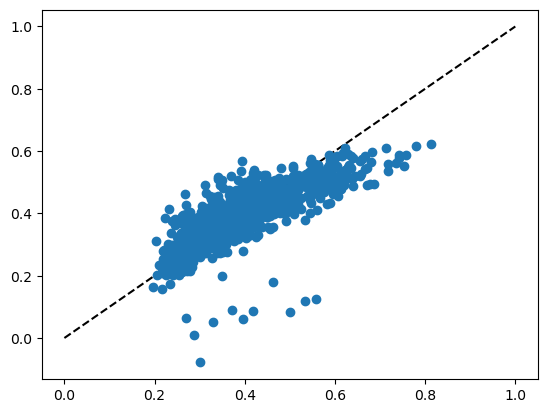

In [15]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 5

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 12,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=0.1)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)